In [1]:
# 사이킷런과 데이터 처리용 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [2]:
# Iris 데이터셋 로드
iris = load_iris()

# 데이터 확인
print("특성 이름:", iris.feature_names)
print("클래스 이름:", iris.target_names)

# 데이터프레임으로 보기 좋게 변환
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
클래스 이름: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# 특성과 라벨 분리
X = iris.data
y = iris.target

# 학습용:검증용 = 8:2로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"학습 데이터 크기: {X_train.shape}, 검증 데이터 크기: {X_test.shape}")

학습 데이터 크기: (120, 4), 검증 데이터 크기: (30, 4)


In [4]:
# KNN 모델 생성 (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# 모델 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Choose one random sample from class 0 (Iris-setosa)
sample_index = np.where(y == 0)[0][0]  # get the first Iris-setosa
sample = X[sample_index].reshape(1, -1)

# Predict its class
predicted = knn.predict(sample)[0]

# Print result
print(f"Actual label: {iris.target_names[y[sample_index]]}")
print(f"Predicted label: {iris.target_names[predicted]}")

Actual label: setosa
Predicted label: setosa


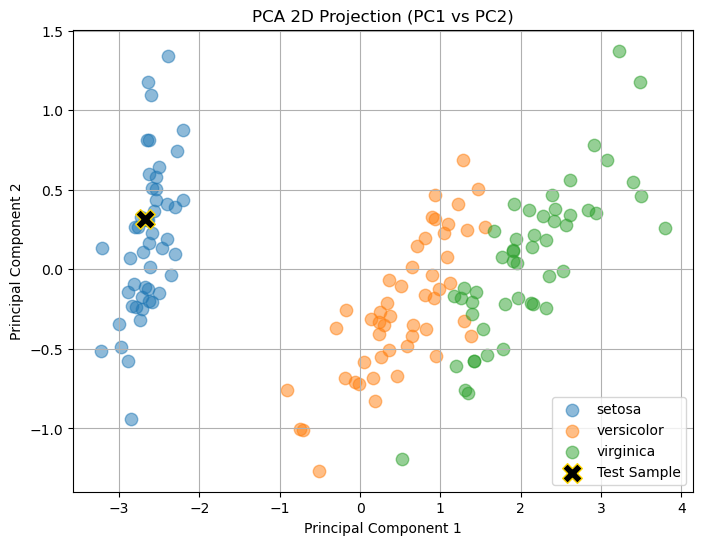

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA (3 components for both 2D and 3D later)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# 2D Scatter Plot
plt.figure(figsize=(8, 6))
for class_idx, class_label in enumerate(iris.target_names):
    plt.scatter(
        X_pca_3d[y == class_idx, 0], X_pca_3d[y == class_idx, 1],
        label=class_label, alpha=0.5, s=80
    )

# Highlight selected sample
plt.scatter(
    X_pca_3d[sample_index, 0], X_pca_3d[sample_index, 1],
    color='black', edgecolor='gold', marker='X', s=200,
    label='Test Sample'
)

plt.title("PCA 2D Projection (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

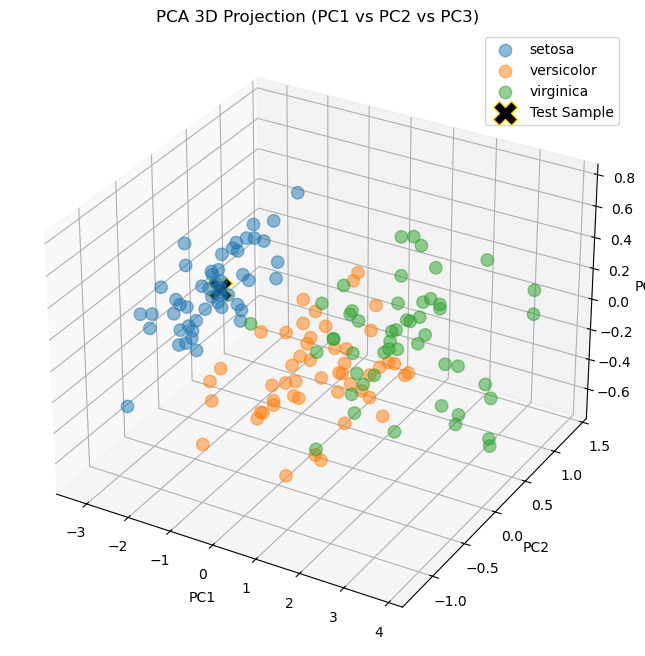

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for class_idx, class_label in enumerate(iris.target_names):
    ax.scatter(
        X_pca_3d[y == class_idx, 0],
        X_pca_3d[y == class_idx, 1],
        X_pca_3d[y == class_idx, 2],
        label=class_label, alpha=0.5, s=80
    )

# Highlight test sample
ax.scatter(
    X_pca_3d[sample_index, 0],
    X_pca_3d[sample_index, 1],
    X_pca_3d[sample_index, 2],
    color='black', edgecolor='gold', s=300, marker='X', label="Test Sample"
)

ax.set_title("PCA 3D Projection (PC1 vs PC2 vs PC3)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

In [23]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

# 일부 예측 결과 확인
print("예측값:", y_pred[:10])
print("실제값:", y_test[:10])

예측값: [0 2 1 1 0 1 0 0 2 1]
실제값: [0 2 1 1 0 1 0 0 2 1]


In [24]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN 분류기의 정확도: {accuracy:.2f}")

KNN 분류기의 정확도: 1.00
